### Import required libraries

In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create SQLite Database & Insert Data

In [19]:
# Connect to (or create) the database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

### Create the sales table

In [20]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
""")

### Insert sample data (only if table is empty)

In [21]:
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:  # Insert only if table is empty
    sample_data = [
        ("Laptop", 5, 60000.00),
        ("Smartphone", 10, 30000.00),
        ("Headphones", 15, 2000.00),
        ("Tablet", 7, 25000.00),
        ("Smartwatch", 8, 8000.00),
        ("Earbuds", 12, 1500.00)
    ]
    cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
    conn.commit()
    print("✅ Database created and sample data inserted.")
else:
    print("ℹ️ Database already has data. Skipping insert.")

ℹ️ Database already has data. Skipping insert.


# Step 2: Run SQL Queries

In [22]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales_data.db") 
cursor = conn.cursor()

# Query 1
query1 = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df_summary = pd.read_sql_query(query1, conn)

# Ensure numeric columns
df_summary['total_qty'] = pd.to_numeric(df_summary['total_qty'], errors='coerce')
df_summary['revenue'] = pd.to_numeric(df_summary['revenue'], errors='coerce')

# Query 2
query2 = """
SELECT SUM(quantity * price) AS total_revenue FROM sales
"""
df_total_revenue = pd.read_sql_query(query2, conn)

# Only close after all queries
conn.close()

# Step 3: Display Results

In [23]:
print("\n=== 📊 Basic Sales Summary ===")
print(df_summary)

print("\n💰 Total Revenue Across All Products:")
print(df_total_revenue)


=== 📊 Basic Sales Summary ===
      product  total_qty   revenue
0     Earbuds         12   18000.0
1  Headphones         15   30000.0
2      Laptop          5  300000.0
3  Smartphone         10  300000.0
4  Smartwatch          8   64000.0
5      Tablet          7  175000.0

💰 Total Revenue Across All Products:
   total_revenue
0       887000.0


# Step 4: Plot Bar Chart of Revenue

<Figure size 800x500 with 0 Axes>

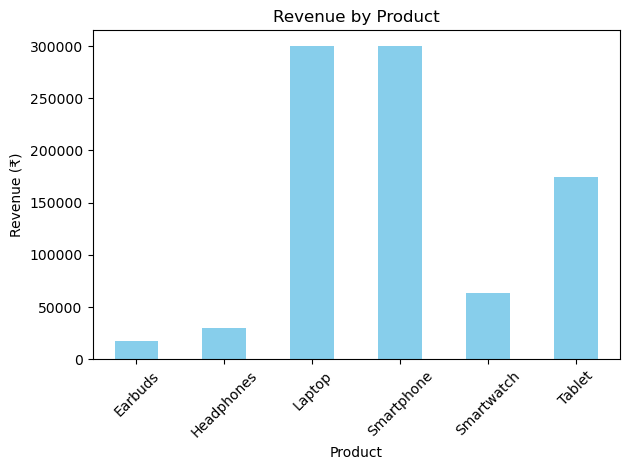

In [24]:
plt.figure(figsize=(8, 5))
df_summary.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue (₹)")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()